In [19]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
DATA = pd.read_csv("DATA.csv")

In [21]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           259 non-null    object 
 1   Item               259 non-null    object 
 2   Serving Size       259 non-null    object 
 3   Serving Size Conv  259 non-null    float64
 4   Calories           259 non-null    int64  
 5   Calories from Fat  259 non-null    int64  
 6   Total Fat          259 non-null    float64
 7   Saturated Fat      259 non-null    float64
 8   Trans Fat          259 non-null    float64
 9   Cholesterol        259 non-null    int64  
 10  Carbohydrates      259 non-null    int64  
 11  Dietary Fiber      259 non-null    int64  
 12  Protein            259 non-null    int64  
 13  vitamin A          259 non-null    int64  
 14  Vitamin C          259 non-null    float64
 15  Calcium            259 non-null    int64  
 16  Iron               259 non

In [22]:
DATA.columns


Index(['Category', 'Item', 'Serving Size', 'Serving Size Conv', 'Calories',
       'Calories from Fat', 'Total Fat', 'Saturated Fat', 'Trans Fat',
       'Cholesterol', 'Carbohydrates', 'Dietary Fiber', 'Protein', 'vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Sodium'],
      dtype='object')

In [23]:
DATA = pd.read_csv("DATA.csv")
DATA.describe()
DATA["Cholesterol"] = DATA["Cholesterol"]/1000        #.apply(lambda x : x/1000)
DATA["vitamin A"] = DATA["vitamin A"]/1000
DATA["Vitamin C"] = DATA["Vitamin C"]/1000
DATA["Calcium"] = DATA["Calcium"]/1000
DATA["Sodium"] = DATA["Sodium"]/1000


In [24]:
DATA

,Category,Item,Serving Size,Serving Size Conv,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Carbohydrates,Dietary Fiber,Protein,vitamin A,Vitamin C,Calcium,Iron,Sodium
0,Breakfast,Egg McMuffin,4.8 oz (136 g),136.0,300,120,13.0,5.0,0.0,0.260,31,4,17,0.090,0.0,0.25,2.70,0.75
1,Breakfast,Egg White Delight,4.8 oz (135 g),135.0,250,70,8.0,3.0,0.0,0.025,30,4,18,0.054,0.0,0.25,1.44,0.77
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),111.0,370,200,23.0,8.0,0.0,0.045,29,4,14,0.072,0.0,0.25,1.80,0.78
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),161.0,450,250,28.0,10.0,0.0,0.285,30,4,21,0.135,0.0,0.30,2.70,0.86
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),161.0,400,210,23.0,8.0,0.0,0.050,30,4,21,0.054,0.0,0.25,1.80,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),285.0,510,150,17.0,9.0,0.5,0.045,80,1,12,0.135,0.0,0.40,1.44,0.28
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),381.0,690,200,23.0,12.0,1.0,0.055,106,1,15,0.180,0.0,0.50,1.80,0.38
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),190.0,340,100,11.0,6.0,0.0,0.030,53,1,8,0.090,0.0,0.25,1.08,0.19
257,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),403.0,810,290,32.0,15.0,1.0,0.060,114,2,21,0.180,0.0,0.60,1.08,0.40


In [25]:
#Breakfast

breakfast_menu = data[data["Category"] == 'Breakfast']
x = breakfast_menu.iloc[:,3:].values

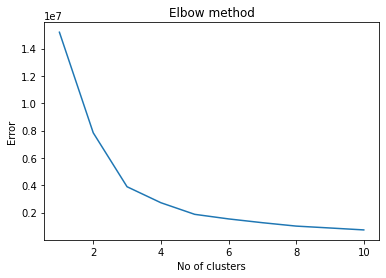

<Figure size 432x288 with 0 Axes>

In [26]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
plt.savefig("elbow method")

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
Let’s implement k-means again using k=3

In [27]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 0 0
 0 0 0 0 0]


array([[ 1.55000000e+02,  3.48461538e+02,  1.40384615e+02,
         1.56153846e+01,  5.57692308e+00,  7.69230769e-02,
         9.03846154e+01,  3.96923077e+01,  3.53846154e+00,
         1.30000000e+01,  5.40000000e+01,  1.22769231e+01,
         1.74615385e+02,  2.21538462e+00,  6.35769231e+02],
       [ 3.99400000e+02,  1.01600000e+03,  4.76000000e+02,
         5.28000000e+01,  1.78000000e+01, -1.38777878e-17,
         3.63000000e+02,  1.01600000e+02,  6.00000000e+00,
         3.40000000e+01,  8.82000000e+01,  1.20000000e+00,
         2.40000000e+02,  6.12000000e+00,  2.11000000e+03],
       [ 1.84833333e+02,  5.21250000e+02,  2.60416667e+02,
         2.90000000e+01,  1.19166667e+01,  1.45833333e-01,
         1.42916667e+02,  4.44166667e+01,  2.54166667e+00,
         2.06250000e+01,  6.15000000e+01,  2.45000000e+00,
         1.38333333e+02,  2.92500000e+00,  1.33541667e+03]])

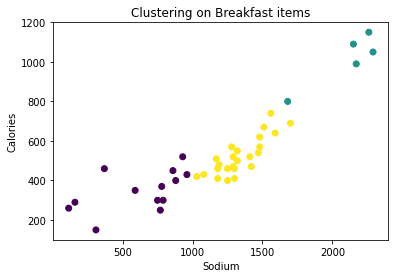

In [28]:
plt.scatter(x[:,-1],x[:,1],c= y_kmeans3)
plt.xlabel("Sodium")
plt.ylabel("Calories")
plt.title("Clustering on Breakfast items")
plt.savefig("Clustering on Breakfast items")

In [29]:
#Main menu

main_menu = data[(data["Category"] == 'Chicken & Fish') | (data["Category"] == 'Beef & Pork') 
                 |(data["Category"] == 'Salads')]
x = main_menu.iloc[:,3:].values

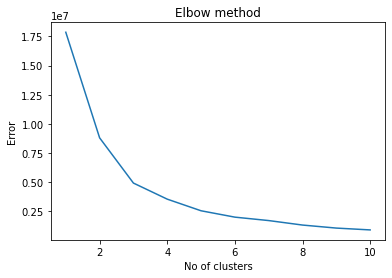

In [30]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [31]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[2 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2
 2 2 1 2 0 0 0 0 0 0]


array([[2.72000000e+02, 2.70000000e+02, 1.08333333e+02, 1.17500000e+01,
        3.75000000e+00, 5.55111512e-17, 5.16666667e+01, 2.16666667e+01,
        4.50000000e+00, 1.98333333e+01, 1.32000000e+03, 1.70000000e+01,
        1.50000000e+02, 1.86000000e+00, 5.88333333e+02],
       [2.64045455e+02, 5.86818182e+02, 2.52272727e+02, 2.80909091e+01,
        8.63636364e+00, 5.00000000e-01, 8.88636364e+01, 5.07272727e+01,
        3.22727273e+00, 3.31818182e+01, 2.36454545e+02, 9.87272727e+00,
        2.09090909e+02, 3.72272727e+00, 1.36045455e+03],
       [1.59052632e+02, 3.97368421e+02, 1.73684211e+02, 1.92105263e+01,
        5.97368421e+00, 4.21052632e-01, 5.92105263e+01, 3.64736842e+01,
        2.10526316e+00, 1.99473684e+01, 3.69473684e+01, 2.33684211e+00,
        1.54736842e+02, 2.95578947e+00, 8.28421053e+02]])

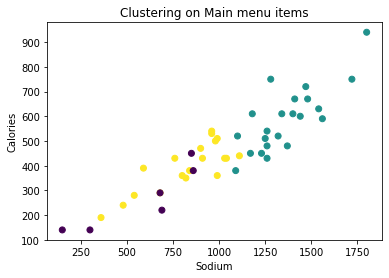

In [32]:
plt.scatter(x[:,-1],x[:,1],c= y_kmeans3)
plt.xlabel("Sodium")
plt.ylabel("Calories")
plt.title("Clustering on Main menu items")
plt.savefig("Clustering on Main menu items")

In [33]:
#Bevarages or drinks 

bevarages_menu = data[(data["Category"] == 'Coffee & Tea') | (data["Category"] == 'Smoothies & Shakes') 
               | (data["Category"] == 'Beverages')]
x = bevarages_menu.iloc[:,3:].values

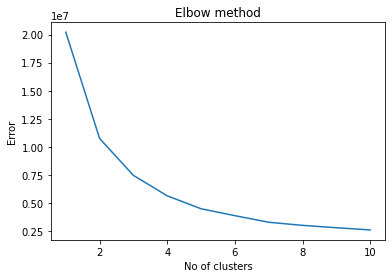

<Figure size 432x288 with 0 Axes>

In [34]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
plt.savefig("elbow2")

In [36]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 2 0 0 0 0 2 2 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 2 0
 0 0 0 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0
 2 0]


array([[ 4.29706140e+02,  2.83508772e+02,  5.85964912e+01,
         6.64035088e+00,  3.92982456e+00,  4.38596491e-02,
         2.27192982e+01,  4.50175439e+01,  1.07017544e+00,
         1.12280702e+01,  1.12105263e+02,  4.21052632e-02,
         3.58771930e+02,  4.67368421e-01,  1.62456140e+02],
       [ 5.76627833e+02,  1.42333333e+02,  1.60833333e+01,
         1.83333333e+00,  1.15000000e+00,  2.77555756e-17,
         7.00000000e+00,  3.13166667e+01,  4.33333333e-01,
         1.20000000e+00,  2.85000000e+01,  8.25000000e+00,
         2.90000000e+01,  6.60000000e-02,  3.93333333e+01],
       [ 5.16358485e+02,  6.12727273e+02,  1.83181818e+02,
         2.03484848e+01,  1.24393939e+01,  7.87878788e-01,
         6.51515152e+01,  9.37878788e+01,  8.78787879e-01,
         1.42424242e+01,  1.81363636e+02, -2.22044605e-15,
         4.68181818e+02,  8.34545455e-01,  2.31666667e+02]])

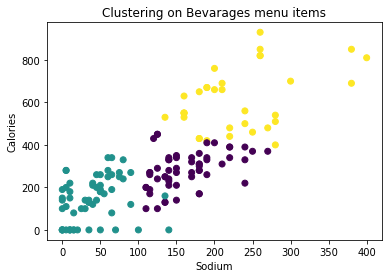

In [37]:
plt.scatter(x[:,-1],x[:,1],c= y_kmeans3)
plt.xlabel("Sodium")
plt.ylabel("Calories")
plt.title("Clustering on Bevarages menu items")
plt.savefig("Clustering on Bevarages menu items")

In [38]:
#Extras or Side dishes or snacks
extras_menu = data[(data["Category"] == 'Desserts') | (data["Category"] == 'Snacks & Sides')]
x = extras_menu.iloc[:,3:].values

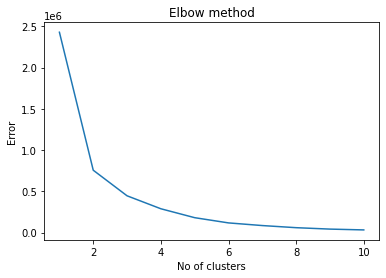

In [39]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [40]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 0 2 2 0 0 0 0 2 0 0 0 2 2 2]


array([[5.97500000e+01, 1.10000000e+02, 3.75000000e+01, 4.18750000e+00,
        1.31250000e+00, 0.00000000e+00, 3.75000000e+00, 1.66250000e+01,
        8.75000000e-01, 1.62500000e+00, 5.96250000e+01, 1.83750000e+01,
        2.75000000e+01, 6.30000000e-01, 6.50000000e+01],
       [1.23500000e+02, 3.03333333e+02, 1.16666667e+02, 1.31666667e+01,
        4.25000000e+00, 0.00000000e+00, 3.91666667e+01, 3.08333333e+01,
        1.00000000e+00, 1.51666667e+01, 2.40000000e+01, 6.00000000e-01,
        1.00000000e+02, 1.80000000e+00, 7.31666667e+02],
       [1.49166667e+02, 3.41666667e+02, 1.13333333e+02, 1.26666667e+01,
        4.83333333e+00, 0.00000000e+00, 1.33333333e+01, 5.08333333e+01,
        2.33333333e+00, 5.50000000e+00, 4.50000000e+01, 1.44000000e+01,
        1.26666667e+02, 7.80000000e-01, 1.75833333e+02]])

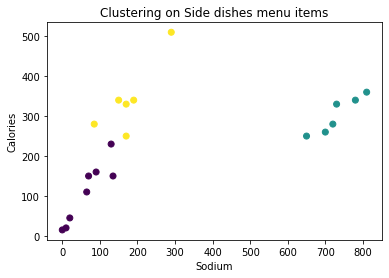

In [41]:
plt.scatter(x[:,-1],x[:,1],c= y_kmeans3)
plt.xlabel("Sodium")
plt.ylabel("Calories")
plt.title("Clustering on Side dishes menu items")
plt.savefig("Clustering on side dishes.png")